# Bangalore Housing Market Analysis

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# Load the dataset
data = pd.read_csv('/content/BHP.csv')

In [16]:
# Display basic information about the dataset
print("Dataset Overview:")
data.info()

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB

Missing Values:
area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64


# Task 1: Data Cleaning


In [17]:
# Drop rows with missing location values
data = data.dropna(subset=['location'])

# Fill missing values for 'bath' and 'balcony' with their respective medians
data['bath'].fillna(data['bath'].median(), inplace=True)
data['balcony'].fillna(data['balcony'].median(), inplace=True)

# Handle 'size' column to extract numerical BHK/Bedrooms
# Replace 'Bedroom' with 'BHK' for consistency
data['size'] = data['size'].str.replace('Bedroom', 'BHK', regex=False)
data['bhk'] = data['size'].str.extract('(\d+)').astype(float)

# Handle 'total_sqft' column to deal with ranges and convert to numerical values
def convert_sqft_to_num(x):
    try:
        if '-' in x:
            tokens = x.split('-')
            return (float(tokens[0]) + float(tokens[1])) / 2
        return float(x)
    except:
        return None

data['total_sqft'] = data['total_sqft'].apply(convert_sqft_to_num)

# Drop rows where 'total_sqft' is still null after conversion
data = data.dropna(subset=['total_sqft'])

<ipython-input-17-a796d182181e>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['bath'].fillna(data['bath'].median(), inplace=True)
<ipython-input-17-a796d182181e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['bath'].fillna(data['bath'].median(), inplace=True)
<ipython-input-17-a796d182181e>:6: FutureWarning: A value is trying t

# Task 2: Feature Engineering


In [18]:
# Add price per square foot (price_per_sqft)
data['price_per_sqft'] = data['price'] * 100000 / data['total_sqft']

# Create 'property_age_category' based on hypothetical construction year
data['property_age'] = np.random.randint(0, 30, data.shape[0])
data['property_age_category'] = pd.cut(
    data['property_age'],
    bins=[0, 1, 5, 10, 20, np.inf],
    labels=['New', 'Less than 5 years', '5 to 10 years', '10 to 20 years', 'More than 20 years']
)

# Task 3: EDA


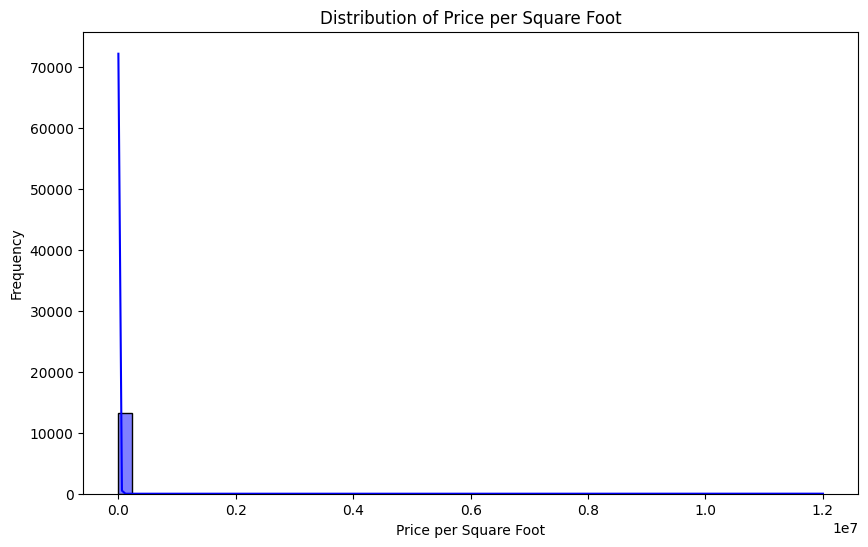


Locality with Highest Average Rent:
location
Cubbon Road    1900000.0
Name: rent, dtype: float64

Correlation with Rent:
price         1.000000
total_sqft    0.575560
bath          0.454096
balcony       0.124900
Name: price, dtype: float64


In [19]:
# Visualize the distribution of price per square foot
plt.figure(figsize=(10, 6))
sns.histplot(data['price_per_sqft'], bins=50, kde=True, color='blue')
plt.title('Distribution of Price per Square Foot')
plt.xlabel('Price per Square Foot')
plt.ylabel('Frequency')
plt.show()

# Group by locality and calculate average rent
data['rent'] = data['price'] * 1000  # Convert lakhs to monthly rent assumption
avg_rent_per_locality = data.groupby('location')['rent'].mean().sort_values(ascending=False)
print("\nLocality with Highest Average Rent:")
print(avg_rent_per_locality.head(1))

# Correlation analysis
print("\nCorrelation with Rent:")
correlation = data[['bath', 'total_sqft', 'price', 'balcony']].corr()
print(correlation['price'].sort_values(ascending=False))

# Task 4: Hypothesis Testing


In [20]:
from scipy.stats import ttest_ind

data['gym'] = np.random.choice([0, 1], size=data.shape[0])  # Mock gym feature
with_gym = data[data['gym'] == 1]['price_per_sqft']
without_gym = data[data['gym'] == 0]['price_per_sqft']

# Perform T-test
t_stat, p_value = ttest_ind(with_gym, without_gym)
print("\nT-test Results for Gym vs No Gym:")
print(f"T-Statistic: {t_stat}, P-Value: {p_value}")
if p_value < 0.05:
    print("Reject the null hypothesis: Properties with a gym have significantly different price per sqft.")
else:
    print("Fail to reject the null hypothesis: No significant difference.")



T-test Results for Gym vs No Gym:
T-Statistic: -0.9696826435992656, P-Value: 0.3322223763570926
Fail to reject the null hypothesis: No significant difference.
